# **STREAMLIT CHECKPOINT-2 BY RP DIATTA**




In this checkpoint, we are going to work on the 'Financial Inclusion in Africa' dataset that was provided as part of the Financial Inclusion in Africa hosted by the Zindi platform.

Dataset description: The dataset contains demographic information and what financial services are used by approximately 33,600 individuals across East Africa. The ML model role is to predict which individuals are most likely to have or use a bank account.

The term financial inclusion means:  individuals and businesses have access to useful and affordable financial products and services that meet their needs – transactions, payments, savings, credit and insurance – delivered in a responsible and sustainable way.


# **INFORMATION SUR LE DATASET**
Variable                     Définitions

country :                     Country interviewee is in.

year :	                      Year survey was done in.

uniqueid	   :               Unique identifier for each interviewee

bank_account :               If interviewee has a bank account :
                             Yes, No

location_type	:              Type of location: Rural, Urban

cellphone_access	:          If interviewee has access to a cellphone:
                             Yes, No

household_size	:             Number of people living in one house

age_of_respondent	 :         The age of the interviewee

gender_of_respondent	:      Gender of interviewee: Male, Female

relationship_with_head	:    The interviewee’s relationship with the
                             head of the house:Head of Household, Spouse, Child, Parent, Other relative, Other non-relatives, Dont know

marital_status	:            The martial status of the interviewee:
                             Married/ Living together, Divorced/Seperated, Widowed, Single/Never Married, Don’t know

education_level :            Highest level of education: No formal
                             education, Primary education, Secondary education, Vocational/Specialised training, Tertiary education, Other/Dont know/RTA

job_type	      :            Type of job interviewee has: Farming and
                             Fishing, Self employed, Formally employed Government, Formally employed Private, Informally employed, Remittance Dependent, Government Dependent, Other Income, No Income, Dont Know/Refuse to answer

# **IMPORTER LES DONNEES ET EFFECTUER LA PHASE D'EXPLORATION DE BASE**

In [ ]:
import pandas as pd

# Charger le fichier CSV
file_path = 'Financial_inclusion_dataset.csv'
data = pd.read_csv(file_path)

In [ ]:
# Exploration dimensions du dataset (lignes, colonnes)
data.shape

(23524, 13)

In [ ]:
# Afficher les premières lignes du dataframe pour avoir un aperçu
data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
#data = data.drop('uniqueid', axis=1)

In [ ]:
data.shape

(23524, 13)

In [ ]:
# Afficher des informations générales sur le dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [ ]:
# Afficher les statistiques descriptives
data.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [ ]:
unique_info = {}

# Parcourir chaque variable dans les données
for variable, values in data.items():
    unique_values = set(values)  # Utilisation d'un ensemble pour obtenir les valeurs uniques
    data_type = type(values[0]).__name__  # Obtenir le type de données (en supposant que toutes les valeurs ont le même type)

    unique_info[variable] = {
        'type': data_type,
        'unique_count': len(unique_values)
    }

# Afficher les résultats
for variable, info in unique_info.items():
    print(f"Variable '{variable}' est de type {info['type']} et a {info['unique_count']} valeur(s) unique(s).")

Variable 'country' est de type str et a 4 valeur(s) unique(s).
Variable 'year' est de type int64 et a 3 valeur(s) unique(s).
Variable 'uniqueid' est de type str et a 8735 valeur(s) unique(s).
Variable 'bank_account' est de type str et a 2 valeur(s) unique(s).
Variable 'location_type' est de type str et a 2 valeur(s) unique(s).
Variable 'cellphone_access' est de type str et a 2 valeur(s) unique(s).
Variable 'household_size' est de type int64 et a 20 valeur(s) unique(s).
Variable 'age_of_respondent' est de type int64 et a 85 valeur(s) unique(s).
Variable 'gender_of_respondent' est de type str et a 2 valeur(s) unique(s).
Variable 'relationship_with_head' est de type str et a 6 valeur(s) unique(s).
Variable 'marital_status' est de type str et a 5 valeur(s) unique(s).
Variable 'education_level' est de type str et a 6 valeur(s) unique(s).
Variable 'job_type' est de type str et a 10 valeur(s) unique(s).


In [ ]:
# Comptage du nombre de variables par type
# Utiliser dtypes pour obtenir les types de données de chaque colonne
types = data.dtypes

# Initialiser des compteurs pour les variables catégorielles et numériques
count_categorical = 0
count_numeric = 0

# Parcourir les types de chaque colonne
for col_type in types:
    if col_type == 'object':  # 'object' est le type pour les variables catégorielles
        count_categorical += 1
    else:
        count_numeric += 1

# Afficher les résultats
print(f"Nombre de variables catégorielles : {count_categorical}")
print(f"Nombre de variables numériques    : {count_numeric}")

Nombre de variables catégorielles : 10
Nombre de variables numériques    : 3


# **EXPLORATION DETAILLEE DU DATASET AVEC INSTALLATION ET UTILISATION DES RAPPORTS DE PANDA PROFILING**

In [ ]:
# Installation de PANDAS PROFILING
!pip install ydata-profiling

In [ ]:
# Importation de ProfileReport de Pandas Profiling
from ydata_profiling import ProfileReport

In [ ]:
# Génération du rapport global de ydata profiling
profile = ProfileReport(data, title="Profiling Report", explorative=True)

In [ ]:
# Afficher le rapport dans un Jupyter Notebook (inside)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# **TRAITEMENT DES VALEURS MANQUANTES ET CORROMPUES**

In [ ]:
# Afficher le nombre de valeurs manquantes pour chaque colonne avant correction
missing_values = data.isnull().sum()

# Afficher les colonnes avec des valeurs manquantes
missing_values[missing_values > 0]

,0


In [ ]:
# Corriger les données manquantes si elles existent
#Remplacer les valeurs manquantes des colonnes numériques avec leurs valeurs médianes respectives
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())

#Remplacer les colonnes catégorielles avec le mode de la colonne.
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

# Vérifier le nombre total de données manquantes après traitement
donnees_manquantes = data.isnull().sum().sum()

# Le succès du traitement correspond à données_manquantes = zéro
if donnees_manquantes == 0:
    print("\nLe traitement des données manquantes s'est très bien déroulé.")
else:
    print("Le traitement des données manquantes n'est pas encore terminé. Voici le nombre total de données manquantes :", donnees_manquantes)


Le traitement des données manquantes s'est très bien déroulé.


In [ ]:
data.isnull().sum()

,0
country,0
year,0
uniqueid,0
bank_account,0
location_type,0
cellphone_access,0
household_size,0
age_of_respondent,0
gender_of_respondent,0
relationship_with_head,0


# **TRAITEMENT DES LIGNES DUPLIQUEES**

In [ ]:
# Afficher les lignes dupliquées
duplicates = data[data.duplicated()]
nombre_lignes_dupliquees = duplicates.shape[0]
print("\nNombre de lignes dupliquées :", nombre_lignes_dupliquees)
#print(f"\n Vérification des lignes dupliquées : {duplicates}")
duplicates
#Suppimer les lignes dupliquées s'il y en a
print("\nSuppression des lignes dupliquées")
lignes_avant_supp = data.shape[0]
print(f"\nNombre de ligne avant suppression {lignes_avant_supp}")
data.drop_duplicates(inplace=True)
lignes_apres_supp = data.shape[0]
print(f"\nNombre de ligne aprés suppression {lignes_apres_supp}")

#Vérification du bon déroulement de la suppression
if lignes_avant_supp - nombre_lignes_dupliquees == lignes_apres_supp:
    print("\nLa suppression des lignes dupliquées s'est très bien déroulée.")
else:
    print("La suppression ded lignes dupliquées n'est pas encore terminée. Voici le nombre total de lignes dupliquées restantes :", duplicates.shape[0])


Nombre de lignes dupliquées : 0

Suppression des lignes dupliquées

Nombre de ligne avant suppression 23524

Nombre de ligne aprés suppression 23524

La suppression des lignes dupliquées s'est très bien déroulée.


# **TRAITEMENT DES VALEURS ABERRANTES**

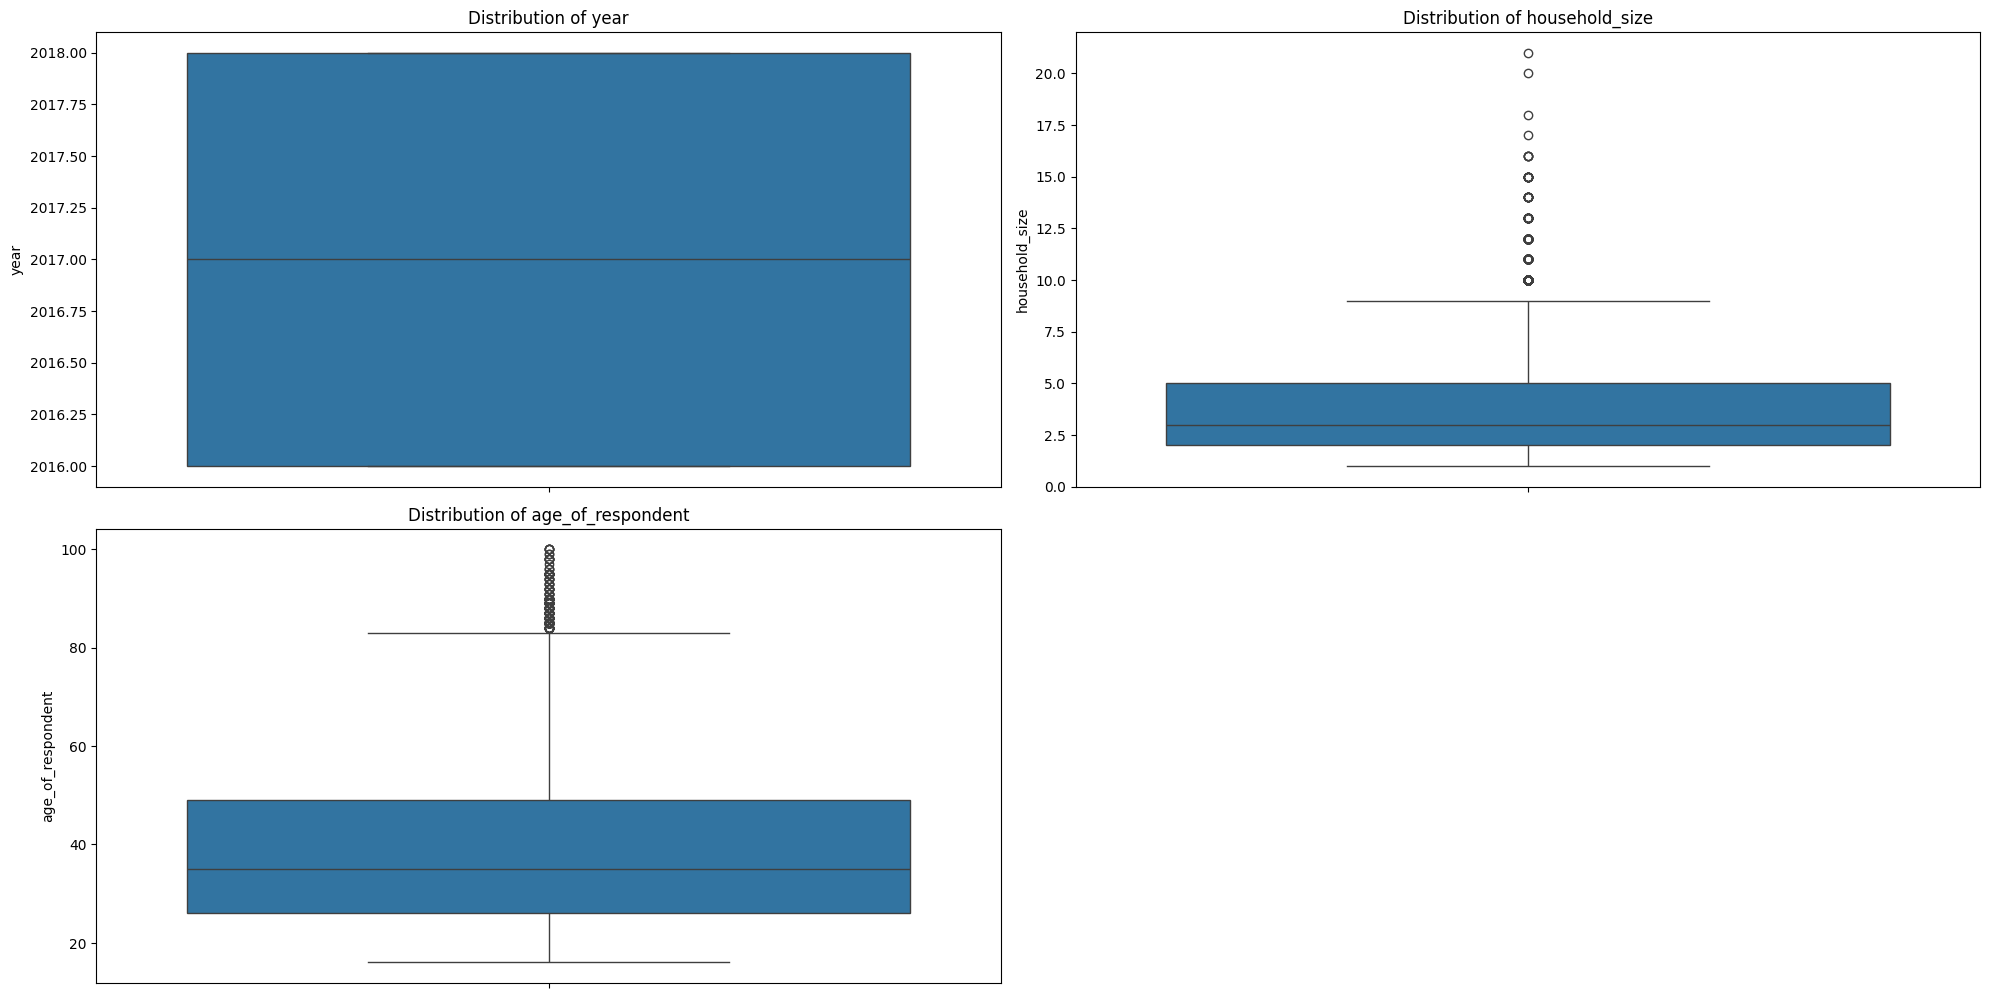

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Afficher les distributions des caractéristiques numériques
numeric_features = data.select_dtypes(include=['float64', 'int64','int32']).columns

plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=data[column])
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

# **CORRECTION DES VALEURS ABERRANTES**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Liste des noms des colonnes spécifiques à traiter
columns_to_process = ['year', 'household_size', 'age_of_respondent']

# Parcourir chaque colonne spécifique à traiter
for column in columns_to_process:
    # Calculer les quartiles
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)

    # Calculer la plage interquartile (IQR)
    IQR = Q3 - Q1

    # Calculer les limites supérieure et inférieure
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifier les valeurs aberrantes dans la colonne spécifique
    aberrant_values = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    # Calculer la médiane de la variable spécifique
    median_value = data[column].median()

    # Remplacer les valeurs aberrantes par la médiane dans la colonne spécifique
    data.loc[(data[column] < lower_bound) | (data[column] > upper_bound), column] = median_value

# **VERIFICATION / BOXPLOT APRES CORRECTION**

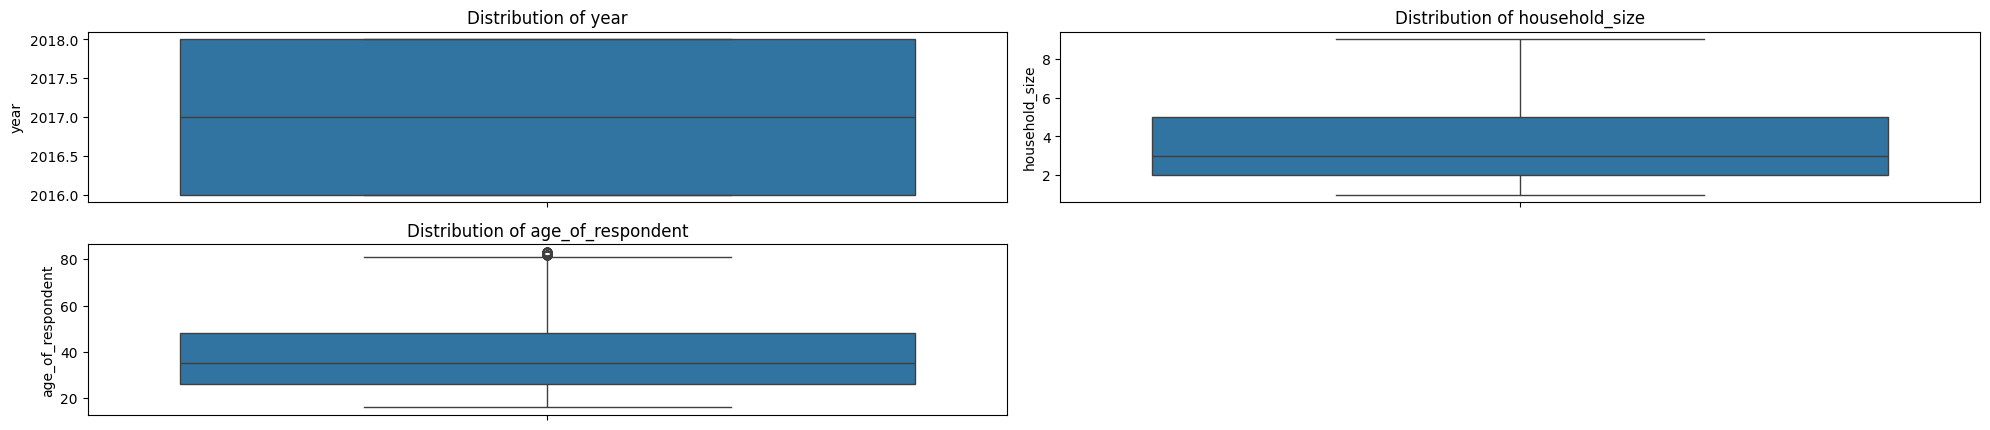

In [ ]:
# Afficher les distributions des caractéristiques numériques
numeric_features = data.select_dtypes(include=['float64', 'int64','int32']).columns

plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_features, 1):
    plt.subplot(7, 2, i)
    sns.boxplot(data=data[column])
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [ ]:
data.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.665618,38.255356
std,0.847371,2.009920,15.720099
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,48.000000
max,2018.000000,9.000000,83.000000


# **ENCODAGE DES VALEURS CATEGORIELLES**

In [ ]:
# Importation de Label encoder et instanciation
#from sklearn.preprocessing import LabelEncoder
#encoder = LabelEncoder()

In [ ]:
# Boucler à travers chaque colonne
#for col in data.columns:
#    if data[col].dtype == 'object':  # Vérifier si la colonne est de type 'object' (catégorique)
#        data[col] = encoder.fit_transform(data[col])

In [ ]:
data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


# **ANALYSE UNIVARIEE**

In [ ]:
data.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

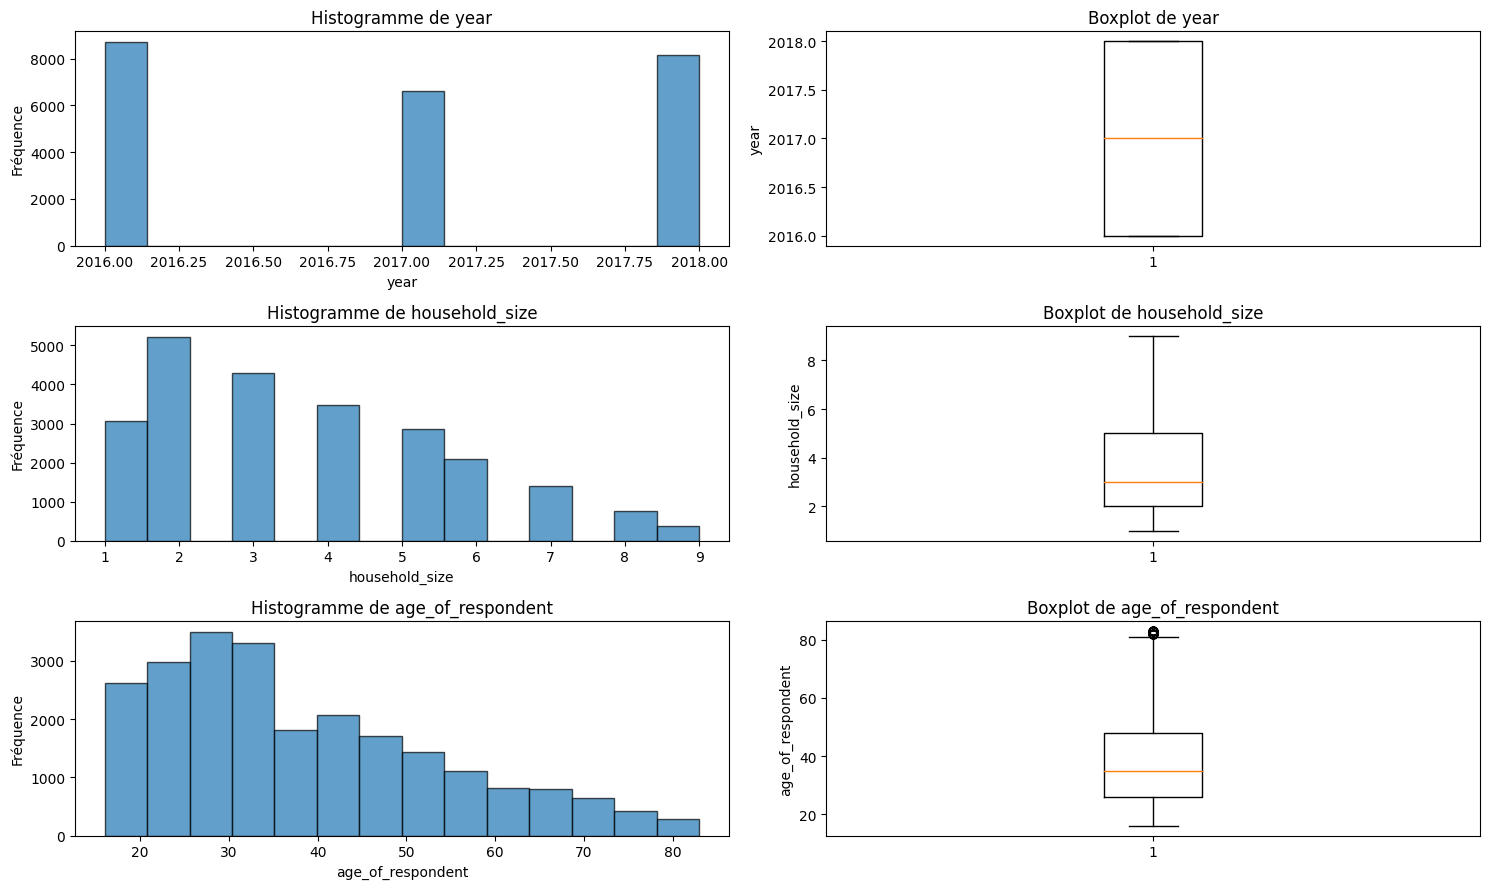

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Liste des colonnes
columns = ['year', 'household_size', 'age_of_respondent']

# Creation de l'histogramme et du boxplot de chaque variable
fig, axes = plt.subplots(len(columns), 2, figsize=(15, len(columns) * 3))


# Plotting
for i, column in enumerate(columns):
    # Histogram
    axes[i, 0].hist(data[column], bins=14, edgecolor='black', alpha=0.7)
    axes[i, 0].set_title(f'Histogramme de {column}')
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Fréquence')

    # Boxplot
    axes[i, 1].boxplot(data[column])
    axes[i, 1].set_title(f'Boxplot de {column}')
    axes[i, 1].set_ylabel(column)

plt.tight_layout()
plt.show()

# **ANALYSE BIVARIEE ENTRE LA VALEUR A PREDIRE ET TOUTES LES AUTRES VARIABLES NUMERIQUES.**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Calculer le coefficient de corrélation de Pearson pour quantifier la force et la direction de la relation linéaire entre chaque paire de variables
correlations = data[['year', 'household_size', 'age_of_respondent']].corr()
print(correlations)

                       year  household_size  age_of_respondent
year               1.000000       -0.100123          -0.023876
household_size    -0.100123        1.000000          -0.113796
age_of_respondent -0.023876       -0.113796           1.000000


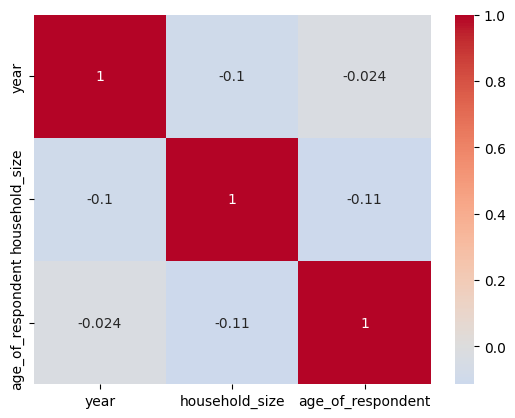

In [ ]:
# Affichage de la matrices de Corrélation qui montre comment les variables sont corrélées entre elles
correlation_matrix = data[['year', 'household_size', 'age_of_respondent']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [ ]:
data.to_csv('Financial_inclusion_output_dataset', index=True)

In [ ]:
# Explorer le nouveau fichier CSV
data = pd.read_csv('Financial_inclusion_output_dataset')
print(data)

       Unnamed: 0 country  year       uniqueid bank_account location_type  \
0               0   Kenya  2018     uniqueid_1          Yes         Rural   
1               1   Kenya  2018     uniqueid_2           No         Rural   
2               2   Kenya  2018     uniqueid_3          Yes         Urban   
3               3   Kenya  2018     uniqueid_4           No         Rural   
4               4   Kenya  2018     uniqueid_5           No         Urban   
...           ...     ...   ...            ...          ...           ...   
23519       23519  Uganda  2018  uniqueid_2113           No         Rural   
23520       23520  Uganda  2018  uniqueid_2114           No         Rural   
23521       23521  Uganda  2018  uniqueid_2115           No         Rural   
23522       23522  Uganda  2018  uniqueid_2116           No         Urban   
23523       23523  Uganda  2018  uniqueid_2117           No         Rural   

      cellphone_access  household_size  age_of_respondent  \
0             

In [ ]:
# Supprimer les colonnes 'Unnamed' du DataFrame
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [ ]:
data.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [ ]:
data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
data.shape

(23524, 13)